In [88]:
import scipy as sp
import matplotlib.pyplot as plt

import librosa
import librosa.display as ld
from IPython.display import Audio

import csv

In [97]:
Audio("Acordes/DO.wav")

In [98]:
data, fs = librosa.load("Acordes/DO.wav")

In [99]:
Audio(data=data, rate=fs)

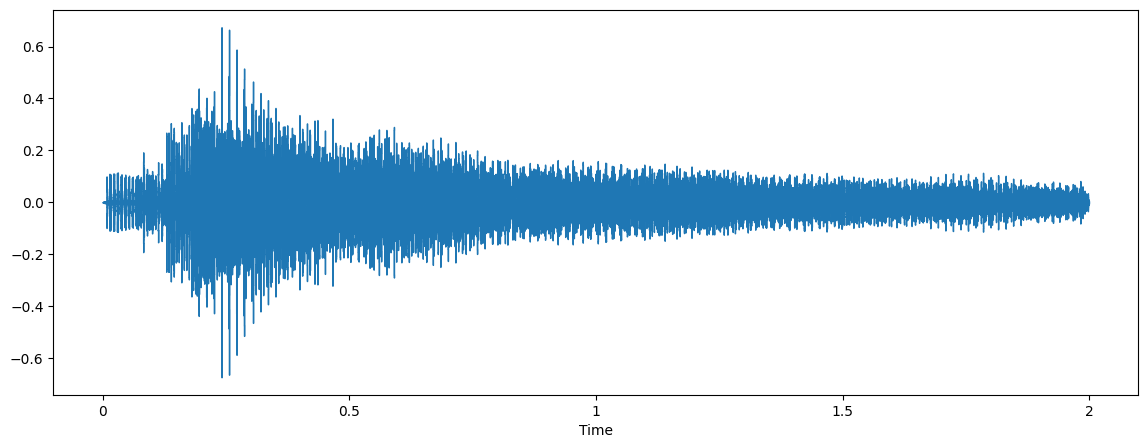

In [91]:
plt.figure(figsize=(14, 5))
ld.waveshow(data, sr=fs)

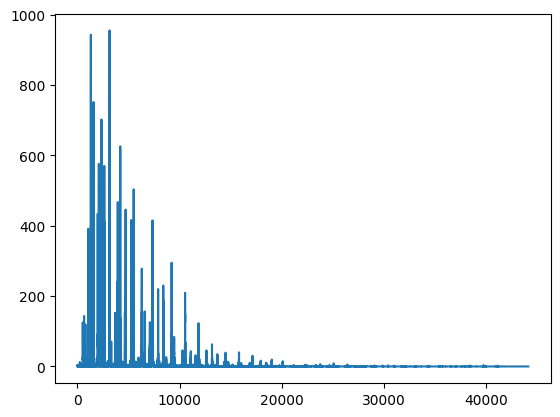

In [92]:
f = sp.fft.dct(data)
f = abs(f)

plt.figure()
plt.plot(f)

In [93]:
def maiores_indices(lista, n):
    if n > len(lista):
        raise ValueError("O número de índices solicitados excede o tamanho da lista.")
    
    # Criar uma lista de tuplas (índice, valor)
    lista_com_indices = list(enumerate(lista))
    
    # Ordenar a lista pelo valor, em ordem decrescente
    lista_ordenada = sorted(lista_com_indices, key=lambda x: x[1], reverse=True)
    
    # Retornar os primeiros 'n' índices
    return [indice for indice, valor in lista_ordenada[:n]]

def carregar_frequencias(arquivo_csv):
    notas = []
    frequencias = []
    
    with open(arquivo_csv, newline='', encoding='utf-8-sig') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        notas = next(reader)
        for linha in reader:
            frequencias.append([float(freq) for freq in linha])
    
    return notas, frequencias

notas, frequencias = carregar_frequencias('Tabelas/frequencias.csv')

def nota_mais_proxima(frequencia):
    global notas
    global frequencias
    
    diferenca_minima = float('inf')
    nota_proxima = None
    
    for i, faixa in enumerate(frequencias):
        for j, freq in enumerate(faixa):
            diferenca = abs(frequencia - freq)
            if diferenca < diferenca_minima:
                diferenca_minima = diferenca
                nota_proxima = notas[j]

    return nota_proxima

def freqs_to_notes(freq_list):
    notes = []
    for freq in freq_list:
        notes.append(nota_mais_proxima(freq))
    
    return notes

In [94]:
print(lista := maiores_indices(f,10))

[3146, 1317, 3145, 1315, 1578, 2352, 4194, 2097, 2630, 3139]


In [95]:
lista = freqs_to_notes(lista)

print(lista)

['G', 'E', 'G', 'E', 'G', 'D', 'C', 'C', 'E', 'G']
